In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

***Описание задачи:***

Датасет содержит опрос удовлетворенности 103904 пассажиров авиакомпаний.Набор данных содержит 25 признаков, по которым можно определить сильно коррелирующие факторы с довольным (или недовольным) пассажиром. Всех пассажиров можно разделить на довльного или недовольного клиента авиакомпании.

***Загрузка данных:***

In [53]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/VITALSKY/ML/main/homework1/airlines_pass.csv")
data_raw.shape

(103904, 25)

In [54]:
data_raw.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3,4,...,5.0,4.0,3.0,4,4.0,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25.0,Business travel,Business,235.0,3,2,...,1.0,1.0,5.0,3,1.0,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2,2,...,5.0,4.0,3.0,4,4.0,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2,5,...,2.0,2.0,5.0,3,1.0,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3,3,...,3.0,3.0,4.0,4,3.0,3,3,0,0.0,satisfied


In [55]:
data_raw.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23.0,Business travel,Eco,192.0,2,1,...,2.0,3.0,1.0,4,2.0,3,2,3,0.0,NaN
103900,103900,73097,Male,Loyal Customer,49.0,Business travel,Business,2347.0,4,4,...,5.0,5.0,5.0,5,5.0,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30.0,Business travel,Business,1995.0,1,1,...,4.0,3.0,2.0,4,5.0,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22.0,Business travel,Eco,1000.0,1,1,...,1.0,4.0,5.0,1,5.0,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,NaN,Business travel,Business,NaN,1,3,...,1.0,1.0,1.0,4,4.0,3,1,0,0.0,NaN


***Признаки(25):***

**Gender**: Пол пассажиров (женщина, мужчина)

**Customer type**: Тип клиента (Лояльный клиент, нелояльный клиент)

**Age**: Фактический возраст пассажиров

**Type of Travel**: Цель полета пассажиров (Личные поездки, Деловые поездки)

**Class**: Класс обслуживания в самолете пассажиров (Бизнес, Эко, Эко Плюс)

**Flight Distance**: Дальность полета этого путешествия

**Inflight wifi service**: Уровень удовлетворенности услугой Wi-Fi на борту (0:Неприменимо;1-5)

**Departure/Arrival time convenient**: Удобный уровень удовлетворенности временем вылета/прилета

**Ease of Online boarding**: Уровень удовлетворенности онлайн-бронированием

**Gate location**: Уровень удовлетворенности расположением ворот

**Food and drink**: Уровень удовлетворенности едой и напитками

**Online boarding**: Уровень удовлетворенности онлайн-посадкой

**Seat comfort**: Уровень удовлетворенности комфортом сидений

**Inflight entertainment**: Уровень удовлетворенности развлечениями на борту

**On-board service**: Уровень удовлетворенности обслуживанием на борту

**Leg room service**: Уровень удовлетворенности обслуживанием leg room

**Baggage handling**: Уровень удовлетворенности обработкой багажа

**Checkin service**: Уровень удовлетворенности услугой check-in

**Inflight service**: Уровень удовлетворенности обслуживанием на борту

**Cleanliness**: Уровень удовлетворенности чистотой

**Departure Delay in Minutes**: Минуты задержки при отъезде

**Arrival Delay in Minutes**: Минуты задержки при заезде

**satisfaction**: Уровень удовлетворенности авиакомпании (удовлетворенность, нейтральность или неудовлетворенность)

Выведем информацию о столбцах, чтобы узнать тип значений в них:

In [56]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103901 non-null  float64
 5   Type of Travel                     103901 non-null  object 
 6   Class                              103898 non-null  object 
 7   Flight Distance                    103902 non-null  float64
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103903 non-null  float64
 11  Gate location                      1039

Имена ячеек:

In [57]:
data_raw.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [58]:
data_raw.index

RangeIndex(start=0, stop=103904, step=1)

***Обработка пропущенных значений***

In [59]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Исследуем категориальные и количественные данные на наличие пустых значений и обработаем их

In [60]:
data_raw[categorical_columns].count(axis = 0)

Gender            103904
Customer Type     103904
Type of Travel    103901
Class             103898
satisfaction      103899
dtype: int64

Пропущенные значения в категориальных данных заполним популярными данными.

In [61]:
data_raw['Gender'] = data_raw['Gender'].fillna(data_raw['Gender'].describe().top)
data_raw['Customer Type'] = data_raw['Customer Type'].fillna(data_raw['Customer Type'].describe().top)
data_raw['Type of Travel'] = data_raw['Type of Travel'].fillna(data_raw['Type of Travel'].describe().top)
data_raw['Class'] = data_raw['Class'].fillna(data_raw['Class'].describe().top)
data_raw['satisfaction'] = data_raw['satisfaction'].fillna(data_raw['satisfaction'].describe().top)

In [62]:
data_raw[categorical_columns].count(axis = 0)

Gender            103904
Customer Type     103904
Type of Travel    103904
Class             103904
satisfaction      103904
dtype: int64

In [63]:
data_raw[numerical_columns].count(axis = 0)

Unnamed: 0                           103904
id                                   103904
Age                                  103901
Flight Distance                      103902
Inflight wifi service                103904
Departure/Arrival time convenient    103904
Ease of Online booking               103903
Gate location                        103904
Food and drink                       103904
Online boarding                      103902
Seat comfort                         103903
Inflight entertainment               103903
On-board service                     103903
Leg room service                     103902
Baggage handling                     103904
Checkin service                      103903
Inflight service                     103904
Cleanliness                          103904
Departure Delay in Minutes           103904
Arrival Delay in Minutes             103594
dtype: int64

Age заполним медианным значением 
Flight distance,ease of online boarding,online boarding,seat comfort,inflight entertaiment,on-boarding service,leg room service,checkin service,Arrival Delay in Minutes - средним значением по данному полю, т.к. это в целом не повлияет на определение довольного/недовольного пассажира. 
                               

In [64]:
data_raw['Age'] = data_raw['Age'].fillna(data_raw['Age'].median(axis = 0), axis = 0)
data_raw['Arrival Delay in Minutes'] = data_raw['Arrival Delay in Minutes'].fillna(data_raw['Arrival Delay in Minutes'].median(axis = 0), axis = 0)
data_raw['Flight Distance'] = data_raw['Flight Distance'].fillna(data_raw['Flight Distance'].median(axis = 0), axis = 0)
data_raw['Ease of Online booking'] = data_raw['Ease of Online booking'].fillna(data_raw['Ease of Online booking'].median(axis = 0), axis = 0)
data_raw['Online boarding'] = data_raw['Online boarding'].fillna(data_raw['Online boarding'].median(axis = 0), axis = 0)
data_raw['Seat comfort'] = data_raw['Seat comfort'].fillna(data_raw['Seat comfort'].median(axis = 0), axis = 0)
data_raw['Inflight entertainment'] = data_raw['Inflight entertainment'].fillna(data_raw['Inflight entertainment'].median(axis = 0), axis = 0)
data_raw['On-board service'] = data_raw['On-board service'].fillna(data_raw['On-board service'].median(axis = 0), axis = 0)
data_raw['Leg room service'] = data_raw['Leg room service'].fillna(data_raw['Leg room service'].median(axis = 0), axis = 0)
data_raw['Checkin service'] = data_raw['Checkin service'].fillna(data_raw['Checkin service'].median(axis = 0), axis = 0)

In [65]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  float64
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  float64
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  float64
 11  Gate location                      1039

***Обработка категориальных значений***

Столбцы ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'] содержат категориальные признаки. Необходимо заменить их тип 'Object' на специальный, предназначенный для хранения категориальных значений

In [66]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [67]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  int64   
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  object  
 4   Age                                103904 non-null  float64 
 5   Type of Travel                     103904 non-null  object  
 6   Class                              103904 non-null  object  
 7   Flight Distance                    103904 non-null  float64 
 8   Inflight wifi service              103904 non-null  int64   
 9   Departure/Arrival time convenient  103904 non-null  int64   
 10  Ease of Online booking             103904 non-null  float64 
 11  Gate location             

In [68]:
data_raw['Customer Type'] = data_raw['Customer Type'].astype('category')
data_raw['Customer Type'].dtype

CategoricalDtype(categories=['Loyal Customer', 'disloyal Customer'], ordered=False)

In [69]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  int64   
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  category
 4   Age                                103904 non-null  float64 
 5   Type of Travel                     103904 non-null  object  
 6   Class                              103904 non-null  object  
 7   Flight Distance                    103904 non-null  float64 
 8   Inflight wifi service              103904 non-null  int64   
 9   Departure/Arrival time convenient  103904 non-null  int64   
 10  Ease of Online booking             103904 non-null  float64 
 11  Gate location             

In [70]:
data_raw['Type of Travel'] = data_raw['Type of Travel'].astype('category')
data_raw['Type of Travel'].dtype

CategoricalDtype(categories=['Business travel', 'Personal Travel'], ordered=False)

In [71]:
data_raw['Class'] = data_raw['Class'].astype('category')
data_raw['Class'].dtype

CategoricalDtype(categories=['Business', 'Eco', 'Eco Plus'], ordered=False)

In [72]:
#data_raw['satisfaction'] = data_raw['satisfaction'].astype('category')
#data_raw['satisfaction'].dtype
data_=data_raw['satisfaction']
data_raw.drop('satisfaction', axis=1, inplace=True)

**Обработка выбросов**

Проверим зависимость дальности полета от возраста пассажира

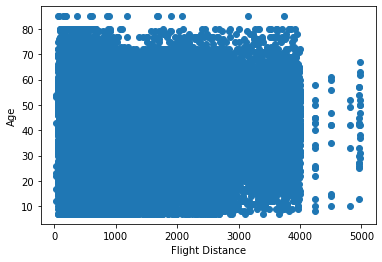

In [73]:
plt.scatter(data_raw['Flight Distance'], data_raw['Age'], alpha=1)
plt.xlabel('Flight Distance')
plt.ylabel('Age')
pass

Заметно, что основное количество точек находится в общей массе, но некоторые значения выходят из определенного диапазона значений(выбрасываются)

Проверим зависимость дальности полета от задержки рейса в минутах

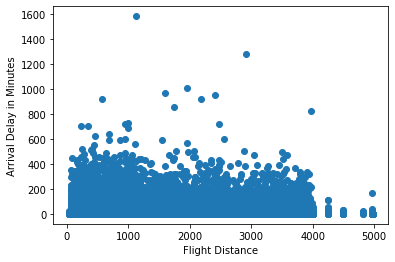

In [74]:
plt.scatter(data_raw['Flight Distance'], data_raw['Arrival Delay in Minutes'], alpha=1)
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay in Minutes')
pass

Аналогично с предыдущим графиком, присутствуют небольшие выбросы.
Для обнаружения выбросов найдем квантили для признаков Arrival Delay in Minutes, Flight Distance и Age!


In [75]:
data_raw['Flight Distance'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     236.0
0.500     843.0
0.700    1513.0
0.900    2750.0
0.950    3383.0
0.999    3995.0
1.000    4983.0
Name: Flight Distance, dtype: float64

In [76]:
data_raw['Age'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100    20.0
0.500    40.0
0.700    48.0
0.900    59.0
0.950    64.0
0.999    79.0
1.000    85.0
Name: Age, dtype: float64

In [77]:
data_raw['Arrival Delay in Minutes'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100       0.000
0.500       0.000
0.700       8.000
0.900      44.000
0.950      79.000
0.999     382.097
1.000    1584.000
Name: Arrival Delay in Minutes, dtype: float64

In [78]:
rows_to_drop = data_raw[
    (data_raw['Arrival Delay in Minutes'] > data_raw['Arrival Delay in Minutes'].quantile(0.999)) | (data_raw['Flight Distance'] > data_raw['Flight Distance'].quantile(0.999))].index
data1 = data_raw.drop(rows_to_drop)

Избавились от выбросов, заметно по размерности текущего датасета

In [79]:
data1.shape

(103701, 24)

***Визуализация и описательная статистика***

Приведем описание следующей таблице:
25% - первый квартиль
50% - второй квартиль
75% - третий квартиль
count - количество значений для каждого признака
mean - среднее значение
std - стандартное отклонение
min/max - мин / макc значение

In [80]:
data1.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000,103701.000000
mean,51943.338975,64938.033982,39.383825,1186.273912,2.729839,3.060395,2.756772,2.976779,3.202361,3.250104,3.439350,3.358251,3.382610,3.350479,3.631672,3.304134,3.641045,3.286169,14.327335,14.631836
std,29994.403661,37474.749898,15.116359,992.677919,1.327882,1.525156,1.398856,1.277579,1.329440,1.349579,1.319126,1.333203,1.288291,1.315932,1.180921,1.265250,1.175506,1.312273,34.355091,34.722864
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25965.000000,32532.000000,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51937.000000,64889.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77917.000000,97407.000000,51.000000,1739.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,3995.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,455.000000,382.000000


In [81]:
data1.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class
count,103701,103701,103701,103701
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,52631,84749,71504,49550


Для категориальных признаков мы получили:

top - наиболее встречающееся значение;

freq - частота наиболее встречающегося значения;

count - количество значений;

unique - количество уникальных значений;



***Вычислим матрицу корреляции***

In [82]:
corr_matrix = data1.corr()
corr_matrix

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002951,0.004710,0.002026,-0.002489,0.000714,0.001894,0.005129,-0.002023,0.001047,0.000150,0.001447,0.000604,0.003928,-0.000592,-0.004175,-0.000039,-0.001029,-0.000749,-0.000908
id,0.002951,1.000000,0.022795,0.096297,-0.021408,-0.002063,0.014099,-0.000574,0.000848,0.055421,0.052939,0.002259,0.055185,0.044723,0.074876,0.079392,0.079291,0.024993,-0.017332,-0.036995
Age,0.004710,0.022795,1.000000,0.099912,0.017926,0.038175,0.024831,-0.001353,0.022801,0.209215,0.160465,0.076435,0.057750,0.040721,-0.047661,0.035476,-0.049789,0.053660,-0.007333,-0.009446
Flight Distance,0.002026,0.096297,0.099912,1.000000,0.007382,-0.019637,0.065751,0.004716,0.057057,0.215669,0.158243,0.129382,0.110331,0.133852,0.063155,0.073367,0.058661,0.093621,0.000095,-0.005170
Inflight wifi service,-0.002489,-0.021408,0.017926,0.007382,1.000000,0.343817,0.715915,0.336050,0.133834,0.457789,0.122523,0.209647,0.121557,0.160812,0.121188,0.042827,0.110537,0.132563,-0.017586,-0.019434
Departure/Arrival time convenient,0.000714,-0.002063,0.038175,-0.019637,0.343817,1.000000,0.436950,0.444661,0.005025,0.070460,0.011639,-0.004945,0.068817,0.012329,0.072022,0.093719,0.073211,0.014598,0.000424,-0.001593
Ease of Online booking,0.001894,0.014099,0.024831,0.065751,0.715915,0.436950,1.000000,0.458460,0.030968,0.404912,0.029865,0.047080,0.038541,0.107921,0.038864,0.010843,0.035216,0.016085,-0.005988,-0.007696
Gate location,0.005129,-0.000574,-0.001353,0.004716,0.336050,0.444661,0.458460,1.000000,-0.001208,0.001769,0.003645,0.003718,-0.028537,-0.005633,0.002423,-0.035625,0.001635,-0.003876,0.006946,0.006625
Food and drink,-0.002023,0.000848,0.022801,0.057057,0.133834,0.005025,0.030968,-0.001208,1.000000,0.234421,0.574910,0.623295,0.058758,0.032429,0.034522,0.086703,0.033726,0.658229,-0.030165,-0.033066
Online boarding,0.001047,0.055421,0.209215,0.215669,0.457789,0.070460,0.404912,0.001769,0.234421,1.000000,0.419655,0.285204,0.155735,0.124045,0.083402,0.203576,0.074698,0.330790,-0.021308,-0.024732


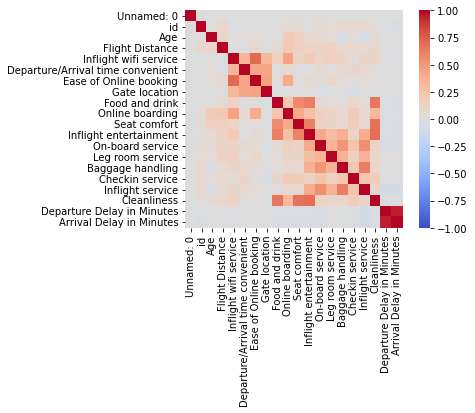

In [83]:
corr_mat = data1.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

In [84]:
corr_mat.where(np.triu(corr_mat > 0.7, k=1)
               ).stack().sort_values(ascending=False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.951641
Inflight wifi service       Ease of Online booking      0.715915
dtype: float64

То, что значение корреляции для параметров **Задержка при отправлении** и **Задержка при приземлении** максимальна близка к 1 -- ОЧЕВИДНА! А корреляцию между довольными людьми онлайн бронированием и услугами WI-FI на борту можно объяснить, что большинство людей пользуется интернетом и пользуется им при покупке билетов и в полете.

In [85]:
data1['Customer Type'].value_counts()

Loyal Customer       84749
disloyal Customer    18952
Name: Customer Type, dtype: int64

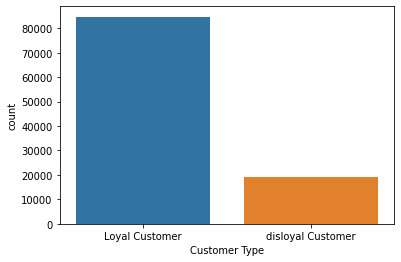

In [86]:
sns.countplot(data=data1,x='Customer Type')
pass

***Обработка категориальных значений***

Мы имеем 5 категориальных признаков: 'Gender', 'Customer Type' , 'Type of Travel' , 'Class' , 'statisfaction'.

In [87]:
data_raw['Gender'].unique()
gender_dummies = pd.get_dummies(data_raw['Gender'])
gender_dummies.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


'Customer Type' сделаем не строковыми значениями

Loyal - 1, disloyal - 0

In [88]:
data_raw['Customer Type'] = data_raw['Customer Type'].astype('object')

data_raw.loc[(data_raw['Customer Type'] == 'disloyal Customer'), 'Customer Type'] = 0
data_raw.loc[(data_raw['Customer Type'] == 'Loyal Customer'), 'Customer Type'] = 1

In [89]:
data_raw['Type of Travel'].unique()
tot_dummies = pd.get_dummies(data_raw['Type of Travel'])
tot_dummies.head()

,Business travel,Personal Travel
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [90]:
data_raw['Class'].unique()
class_dummies = pd.get_dummies(data_raw['Class'])
class_dummies.head()

,Business,Eco,Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [91]:
#data_raw['satisfaction'].unique()
#sat_dummies = pd.get_dummies(data_raw['satisfaction'])
#sat_dummies.head()

In [92]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  int64   
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  object  
 4   Age                                103904 non-null  float64 
 5   Type of Travel                     103904 non-null  category
 6   Class                              103904 non-null  category
 7   Flight Distance                    103904 non-null  float64 
 8   Inflight wifi service              103904 non-null  int64   
 9   Departure/Arrival time convenient  103904 non-null  int64   
 10  Ease of Online booking             103904 non-null  float64 
 11  Gate location             

In [93]:
data_

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

In [94]:
data_raw = pd.concat((data_raw, class_dummies), axis = 1)
#data_raw = pd.concat((data_raw, sat_dummies), axis = 1)
data_raw = pd.concat((data_raw, tot_dummies), axis = 1)
data_raw = pd.concat((data_raw, gender_dummies), axis = 1)

data_raw = data_raw.drop(['Class','Type of Travel','Gender'], axis = 1)
data_raw.head()

,Unnamed: 0,id,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business,Eco,Eco Plus,Business travel,Personal Travel,Female,Male
0,0,70172,1,13.0,460.0,3,4,3.0,1,5,...,5,25,18.0,0,0,1,0,1,0,1
1,1,5047,0,25.0,235.0,3,2,3.0,3,1,...,1,1,6.0,1,0,0,1,0,0,1
2,2,110028,1,26.0,1142.0,2,2,2.0,2,5,...,5,0,0.0,1,0,0,1,0,1,0
3,3,24026,1,25.0,562.0,2,5,5.0,5,2,...,2,11,9.0,1,0,0,1,0,1,0
4,4,119299,1,61.0,214.0,3,3,3.0,3,4,...,3,0,0.0,1,0,0,1,0,0,1


In [95]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  float64
 4   Flight Distance                    103904 non-null  float64
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  float64
 8   Gate location                      103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Online boarding                    103904 non-null  float64
 11  Seat comfort                       1039

***Нормализация***

In [96]:
numerical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
data_norm = data_raw[numerical_columns]
data_norm.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business,Eco,Eco Plus,Business travel,Personal Travel,Female,Male
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379966,1189.444988,2.729683,3.060296,2.756881,2.976883,3.202129,3.250375,...,3.286351,14.815618,15.133392,0.478018,0.449858,0.072124,0.689627,0.310373,0.507459,0.492541
std,29994.645522,37463.812252,15.114826,997.143375,1.327829,1.525075,1.398912,1.277621,1.329533,1.349502,...,1.312273,38.230901,38.649776,0.499519,0.497482,0.258695,0.462649,0.462649,0.499947,0.499947
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,12.000000,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
data_norm = (data_raw - data_norm.mean(axis = 0))/data_norm.std(axis = 0)
data_norm.describe()

,Age,Arrival Delay in Minutes,Baggage handling,Business,Business travel,Checkin service,Cleanliness,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Inflight wifi service,Leg room service,Male,On-board service,Online boarding,Personal Travel,Seat comfort,Unnamed: 0,id
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,...,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-1.136380e-16,1.463429e-17,1.914767e-18,5.737463e-17,7.282954e-17,-2.543905e-17,-4.321903e-17,1.853221e-17,-1.155699e-16,-1.319822e-16,...,5.607532e-17,1.204252e-16,3.391873e-17,3.788504e-17,1.377265e-16,1.914767e-18,-7.282954e-17,1.460010e-16,-3.501289e-17,-5.301512e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142265e+00,-3.915519e-01,-2.228661e+00,-9.569570e-01,-1.490607e+00,-2.611326e+00,-2.504320e+00,-3.875299e-01,-2.006653e+00,-1.970732e+00,...,-3.096489e+00,-2.055748e+00,-2.547168e+00,-9.851873e-01,-2.625336e+00,-2.408574e+00,-6.708614e-01,-2.607413e+00,-1.732026e+00,-1.732958e+00
25%,-8.190611e-01,-3.915519e-01,-5.350423e-01,-9.569570e-01,-1.490607e+00,-2.404896e-01,-9.802465e-01,-3.875299e-01,-6.952418e-01,-5.410499e-01,...,-5.447375e-01,-5.495308e-01,-1.026945e+00,-9.851873e-01,-1.072968e+00,-9.265459e-01,-6.708614e-01,-1.091205e+00,-8.660129e-01,-8.645799e-01
50%,4.102157e-02,-3.915519e-01,3.117670e-01,-9.569570e-01,6.708614e-01,-2.404896e-01,-2.182099e-01,-3.875299e-01,-3.953644e-02,1.737912e-01,...,3.058464e-01,2.035780e-01,4.932781e-01,-9.851873e-01,4.794003e-01,-1.855317e-01,-6.708614e-01,4.250036e-01,0.000000e+00,-1.807357e-03
75%,7.687838e-01,-5.519805e-02,1.158576e+00,1.044969e+00,6.708614e-01,5.497894e-01,5.438268e-01,-7.364771e-02,6.161689e-01,8.886323e-01,...,1.156430e+00,9.566867e-01,4.932781e-01,1.015026e+00,4.794003e-01,5.554825e-01,1.490607e+00,1.183108e+00,8.660129e-01,8.660101e-01
max,3.018231e+00,4.059187e+01,1.158576e+00,1.044969e+00,6.708614e-01,1.340068e+00,1.305863e+00,4.125418e+01,1.271874e+00,1.603473e+00,...,1.156430e+00,1.709795e+00,1.253390e+00,1.015026e+00,1.255584e+00,1.296497e+00,1.490607e+00,1.183108e+00,1.732026e+00,1.733828e+00


Отлично, перейдем к разбиению на обучающую и тестовую выборку

**Обучение**

**Выбор обучающей и тестовой выборок**

In [47]:
X = data_raw.drop('Customer Type', axis = 1)
y = data_
feature_names = X.columns

In [48]:
feature_names

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Business', 'Eco', 'Eco Plus', 'Business travel', 'Personal Travel',
       'Female', 'Male'],
      dtype='object')

In [98]:
X# = X.to_numpy()
#type(X)

array([[0.00000e+00, 7.01720e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 5.04700e+03, 2.50000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.00000e+00, 1.10028e+05, 2.60000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [1.03901e+05, 6.88250e+04, 3.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.03902e+05, 5.41730e+04, 2.20000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.03903e+05, 6.25670e+04, 4.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [99]:
#y = np.array(y, dtype='int')
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

***Смотрим совпадают ли размерности массивов для работы с ними***

разобьем данные на обучающую и тестовую выборки. За обучающую возьмем 0.75 данных, за тестовую 025

In [100]:
print(X.shape)
print(y.shape)
N, d = X.shape

(103904, 27)
(103904,)


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

77928 25976


***kNN - метод ближайших соседей***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)

In [ ]:
err_test

0.4096666666666667

Возьмем 7 соседей

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.4256666666666667

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.4226666666666667

***Random Forest***

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0


In [ ]:
np.sum(rf.feature_importances_)

1.0

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]])) 

Feature ranking:
 1. feature 'satisfied' (0.361839)
 2. feature 'Business travel' (0.343095)
 3. feature 'Seat comfort' (0.069132)
 4. feature '  Eco' (0.036982)
 5. feature 'Departure/Arrival time convenient' (0.029247)
 6. feature 'Eco Plus' (0.026873)
 7. feature 'Personal Travel' (0.026336)
 8. feature 'Female' (0.022848)
 9. feature 'On-board service' (0.019628)
10. feature 'Inflight entertainment' (0.012207)
11. feature 'Baggage handling' (0.008625)
12. feature 'Leg room service' (0.006913)
13. feature '  Age' (0.005835)
14. feature 'Gate location' (0.005518)
15. feature 'Departure Delay in Minutes' (0.005142)
16. feature 'Inflight wifi service' (0.004181)
17. feature 'Checkin service' (0.003871)
18. feature 'Cleanliness' (0.003144)
19. feature 'Inflight service' (0.002138)
20. feature 'Flight Distance' (0.001481)
21. feature '   id' (0.001228)
22. feature 'Online boarding' (0.000997)
23. feature 'Ease of Online booking' (0.000667)
24. feature 'Food and drink' (0.000524)
25. feat

(-5.0, 15.0)

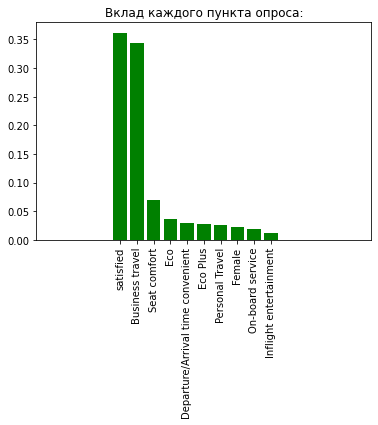

In [ ]:
d_first = 10
plt.title("Вклад каждого пункта опроса:")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'green')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-5, d_first+5])

Можно сказать, что половина принаков вносит свой значительный вклад, а в основном Age, Personal Travel, Buisiness travel Flight Distance

**ВЫВОД:**

-Безусловно алгоритм Random Forest, чем метод ближайших соседей;

-При увеличении числа соседей, ошибка уменьшается на тестовой выборке;

-0.0 ошибка на обучающей выборке, и 0.01324299353249153 ошибка на тестовой выборке при методе random forest; а у knn - 0.18


# **ОБУЧЕНИЕ НА НАШЕЙ ВЫБОРКЕ ПОЛНОСВЯЗНУЮ(НЕГЛУБОКУЮ)НЕЙРОННУЮ СЕТЬ.**

На обучающую и тестовую выборку уже разбили, далее следует обучить классификатор.

In [102]:
from sklearn.neural_network import MLPClassifier

In [103]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [104]:
#X = data_raw
#y = data_raw['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 20000, test_size = 3000,stratify = y, random_state = 2)
X_train.shape, X_test.shape 

((20000, 27), (3000, 27))

In [105]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: user 45.2 s, sys: 27 s, total: 1min 12s
Wall time: 38.6 s


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

**Далее как это предлагается на https://github.com/NikolaiZolotykh/MachineLearningCourse/blob/master/14.%20MLP%20-%20%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85%20%D1%86%D0%B8%D1%84%D1%80.ipynb проверим качество классификатора.**

In [106]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

# **Ошибки на обучающей и тестовой выборке**

In [107]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.4113 0.416


**Или так:**

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)


0.5887

In [109]:
accuracy_score(y_test, y_test_pred)

0.584

# **Подбор _гипер_параметров**
# Подберем оптимальное значение параметра регуляризации alpha

In [136]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (3,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

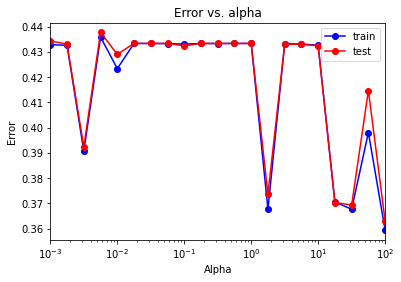

In [137]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

**Рассмотрим как менялась метрика в зависимости от гиперпараметра:**

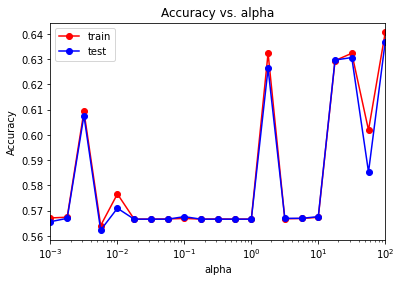

In [138]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [124]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (30,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

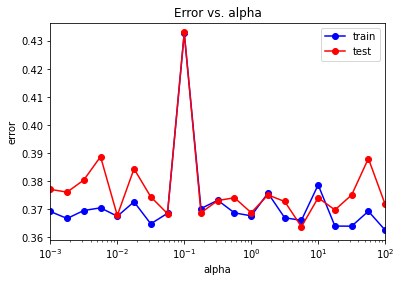

In [125]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

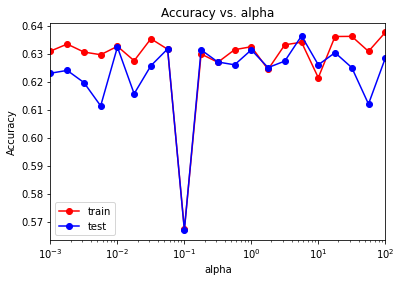

In [126]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [127]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = 35, 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

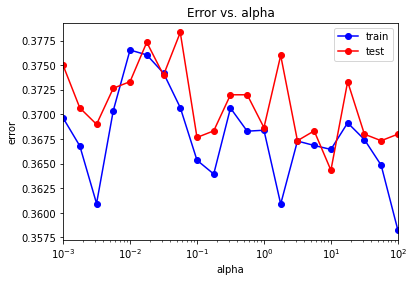

In [128]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

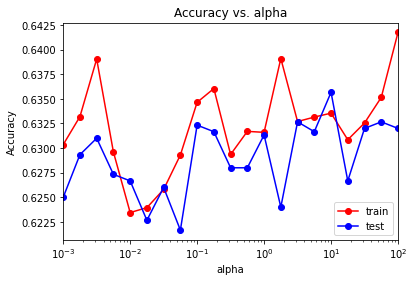

In [129]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

# Минимальное значение ошибки:

In [139]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.3594 0.363


Оптимальное значение alpha:

In [140]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[100.]


In [141]:
alpha_opt = alpha_opt[0]

# **Классификатор при найденном оптимальном значении alpha:**
**Повторим обучение:**

In [142]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (3,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.3594
0.363


# Матрица рассогласования:

In [143]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay,accuracy_score


In [144]:
print(confusion_matrix(y_test_pred, y_test))

[[1343  732]
 [ 357  568]]


In [145]:
#M = confusion_matrix(y_test_pred, y_test)
#M = np.sqrt(M)
#plt.imshow(M, interpolation = 'nearest')
#plt.set_cmap('binary')
#plt.xticks(range(10))
#plt.yticks(range(10))
#plt.xlabel("true label")
#plt.ylabel("predicted label")
#plt.colorbar()
#pass

**Вариант с использованием встроенной в Sklearn функцией, которая сама считает и отрисовывает Confusion matrix**

In [146]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


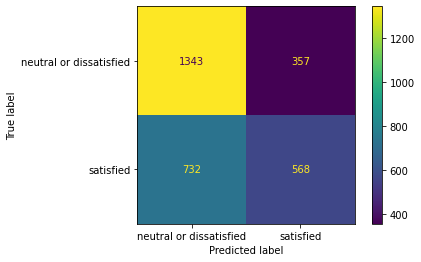

In [147]:
plot_confusion_matrix(mlp_model, X_test, y_test) 

Другие метрики качества:

In [148]:
from sklearn.metrics import classification_report


In [149]:
print(classification_report(y_test, y_test_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.65      0.79      0.71      1700
              satisfied       0.61      0.44      0.51      1300

               accuracy                           0.64      3000
              macro avg       0.63      0.61      0.61      3000
           weighted avg       0.63      0.64      0.62      3000



 **Вывод**:Данная задача достаточно сносно классифицируется с текущим набором параметров и с выбранными классами классификации. Также ,возможно, при переборе гипер_параметров можно подобрать более оптимальный вариант. В целом, если увеличить тренировочную и контрольную выборку, то результат только улучшится. 